In [3]:
import numpy as np
from cvid_data import cvid_2d as cvid

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import os 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
l = os.listdir()
s = []

for item in l:
    if item.endswith('_cvid_data0.npz'):
        s.append(item)

In [5]:
mRr=[]
mRi=[]
mRrerr=[]
mRierr=[]
mmRr=[]
mmRi=[]
mmRrerr=[]
mmRierr=[]
msnRr=[]
msnRi=[]
msnRrerr=[]
msnRierr=[]
mcoRr=[]
mcoRi=[]
mcoRrerr=[]
mcoRierr=[]
mfT1=[]
mfT2=[]
    
for item in s:
    mRr.append(np.load(item)['mRr'].T)
    mRi.append(np.load(item)['mRi'].T)
    mRrerr.append(np.load(item)['mRrerr'])
    mRierr.append(np.load(item)['mRierr'])
    
    mmRr.append(np.load(item)['mmRr'].T)
    mmRi.append(np.load(item)['mmRi'].T)
    mmRrerr.append(np.load(item)['mmRrerr'])
    mmRierr.append(np.load(item)['mmRierr'])
   
    msnRr.append(np.load(item)['msnRr'].T)
    msnRi.append(np.load(item)['msnRi'].T)
    msnRrerr.append(np.load(item)['msnRrerr'])
    msnRierr.append(np.load(item)['msnRierr'])
    
    mcoRr.append(np.load(item)['mcoRr'].T)
    mcoRi.append(np.load(item)['mcoRi'].T)
    mcoRrerr.append(np.load(item)['mcoRrerr'])
    mcoRierr.append(np.load(item)['mcoRierr'])
       
    mfT1.append(np.load(item)['mfT1'])
    mfT2.append(np.load(item)['mfT2'])

## m

In [6]:
from random import randint
colors = []

for i in range(len(s)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

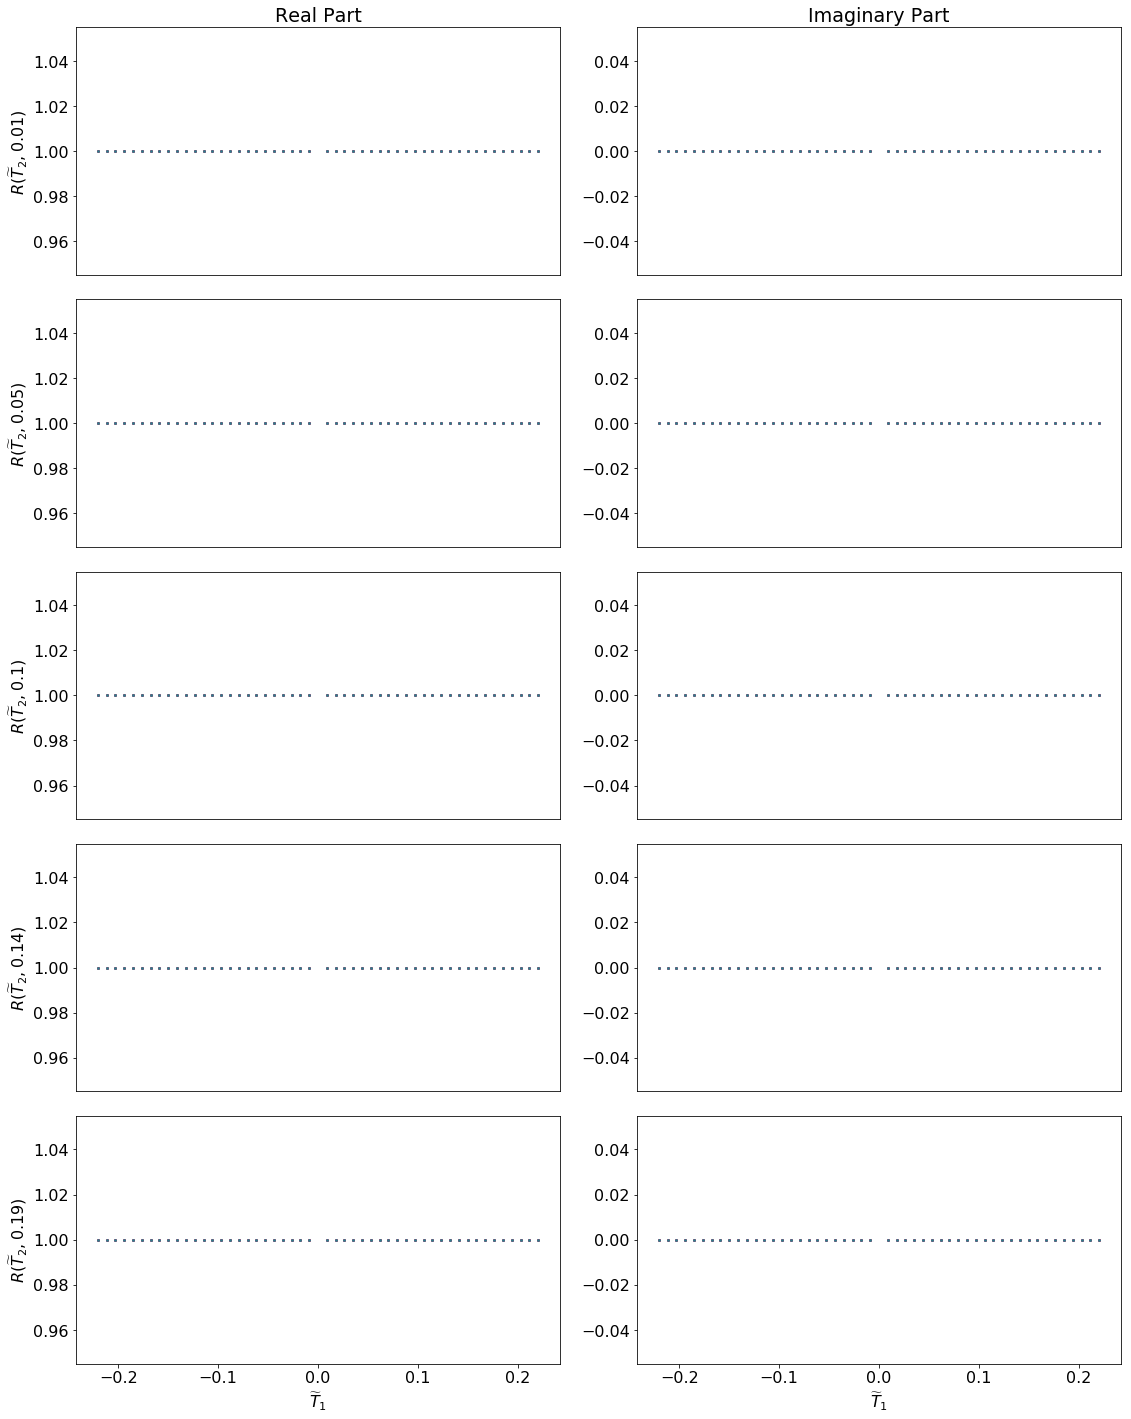

In [7]:
fig = plt.figure(figsize=[16,20])
for Rr,Ri,Rrerr,Rierr,fT1,fT2,color in zip(mRr,mRi,mRrerr,mRierr,mfT1,mfT2,colors):
    for jj in range(0,25,5): 
        ax = plt.subplot(5,2,int(2*(jj/5)+1))
        plt.errorbar(fT1,Rr[:,jj],fmt='o',c=color,markersize=2,yerr=Rrerr[:,jj], ecolor='r')
        if jj<20:
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$')

        ax.set_ylabel('$R(\widetilde{T}_2,$'+str(fT2[jj].round(2))+'$)$')

        if jj==0:
            ax.set_title('Real Part')


        ax = plt.subplot(5,2,int(2*(jj/5+1)))
        plt.errorbar(fT1,Ri[:,jj],fmt='o',c=color,markersize=2,yerr=Rierr[:,jj], ecolor='r')

        if jj<20:
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$')

        if jj==0:
            ax.set_title('Imaginary Part')

        plt.tight_layout()
#plt.savefig('m_30')

## mm

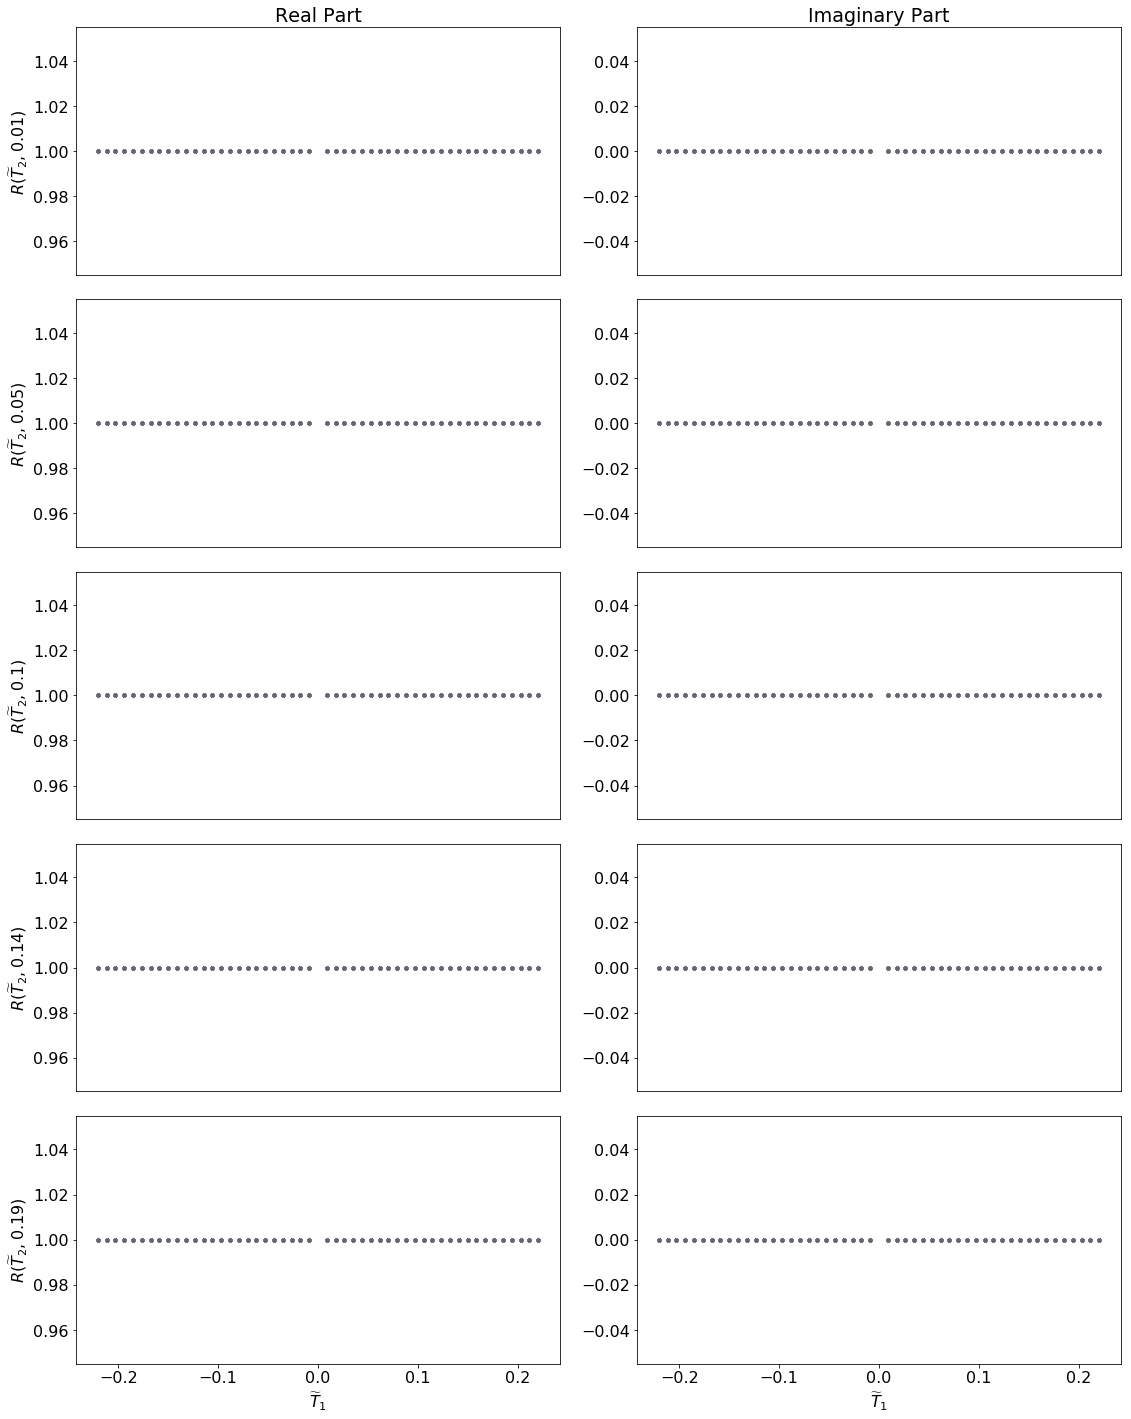

In [8]:
fig = plt.figure(figsize=[16,20])
for Rr,Ri,Rrerr,Rierr,fT1,fT2,color in zip(mmRr,mmRi,mmRrerr,mmRierr,mfT1,mfT2,colors):
    for jj in range(0,25,5): 
        ax = plt.subplot(5,2,int(2*(jj/5)+1))
        plt.errorbar(fT1,Rr[:,jj],c=color,fmt='o',markersize=3,yerr=Rrerr[:,jj], ecolor='r')
        if jj<20:
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$')

        ax.set_ylabel('$R(\widetilde{T}_2,$'+str(fT2[jj].round(2))+'$)$')

        if jj==0:
            ax.set_title('Real Part')


        ax = plt.subplot(5,2,int(2*(jj/5+1)))
        plt.errorbar(fT1,Ri[:,jj],c=color,fmt='o',markersize=3,yerr=Rierr[:,jj], ecolor='r')

        if jj<20:
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$')

        if jj==0:
            ax.set_title('Imaginary Part')

        plt.tight_layout()
#plt.savefig('mm_30')

## m,mm,msn

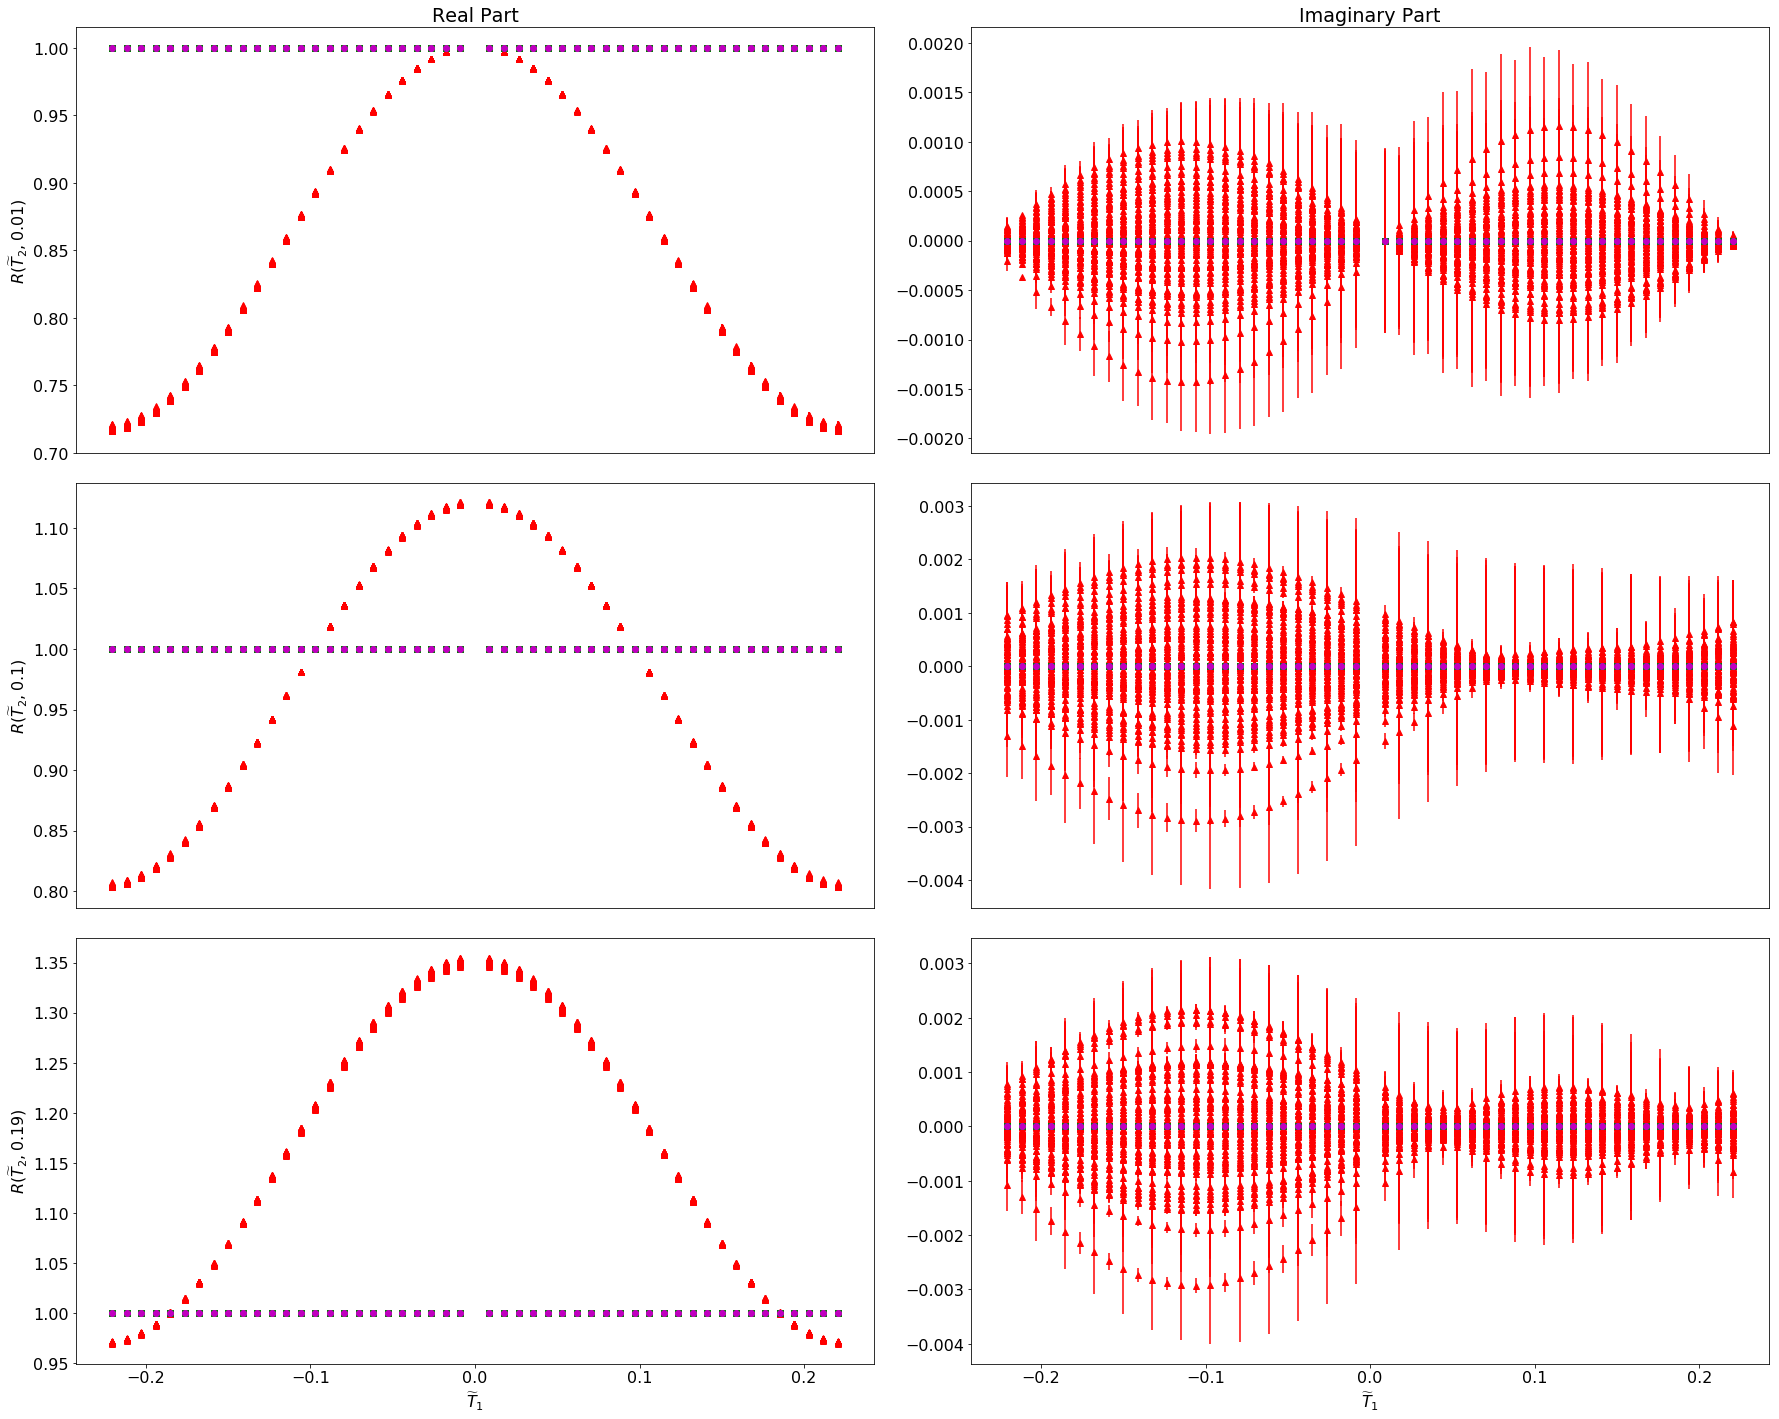

In [9]:
fig = plt.figure(figsize=[25,20])

for m_Rr,m_Ri,m_Rrerr,m_Rierr,mm_Rr,mm_Ri,mm_Rrerr,mm_Rierr,msn_Rr,msn_Ri,msn_Rrerr,msn_Rierr,m_fT1,m_fT2 \
in zip(mRr,mRi,mRrerr,mRierr,mmRr,mmRi,mmRrerr,mmRierr,msnRr,msnRi,msnRrerr,msnRierr,mfT1,mfT2):

    for jj, odd, even in zip([0,10,20], [1,3,5], [2,4,6]):
        ax = plt.subplot(3,2,odd)
        plt.errorbar(m_fT1,msn_Rr[:,jj],fmt='^r',yerr=msn_Rrerr[:,jj], ecolor='r')
        plt.errorbar(m_fT1,mm_Rr[:,jj],fmt='sg',yerr=mm_Rrerr[:,jj], ecolor='g')
        plt.errorbar(m_fT1,m_Rr[:,jj],fmt='om',yerr=m_Rrerr[:,jj], ecolor='m')
#         plt.xlim(-1,1) 
#         plt.ylim(-1,1)
        if odd<5: 
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$') 
        if jj==0:
            ax.set_title('Real Part')

        ax.set_ylabel('$R(\widetilde{T}_2,$'+str(m_fT2[jj].round(2))+'$)$')


        ax = plt.subplot(3,2,even)
        plt.errorbar(m_fT1,msn_Ri[:,jj],fmt='^r',yerr=msn_Rierr[:,jj], ecolor='r')
        plt.errorbar(m_fT1,mm_Ri[:,jj],fmt='sg',yerr=mm_Rierr[:,jj], ecolor='g')
        plt.errorbar(m_fT1,m_Ri[:,jj],fmt='om',yerr=m_Rierr[:,jj], ecolor='m')
#         plt.xlim(-1,1) 
#         plt.ylim(-1,1)
        if even<6: 
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$')
        if even==2:
            ax.set_title('Imaginary Part')

        plt.tight_layout()

## m,mm,msn,mco

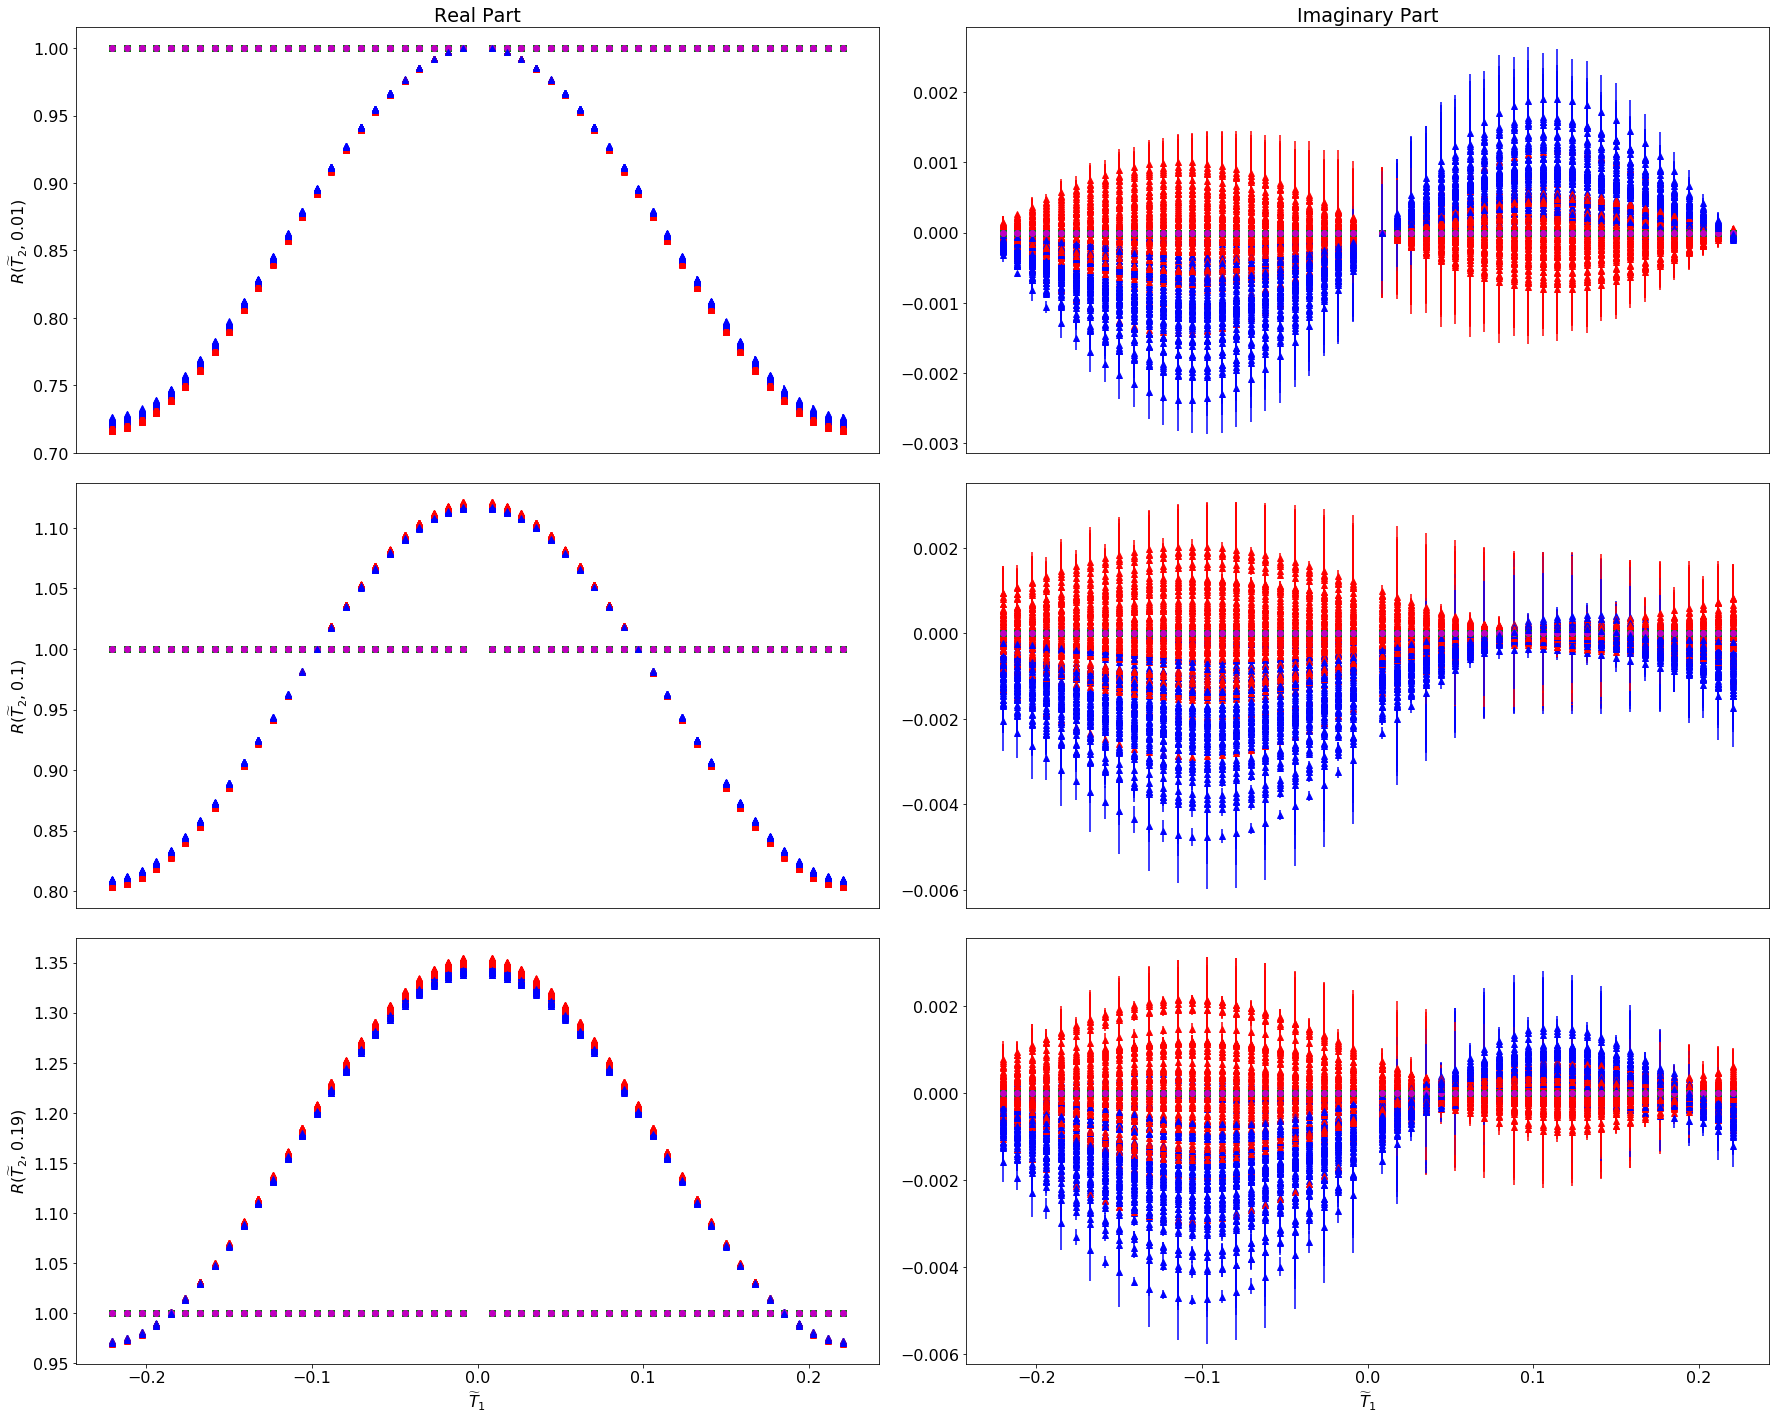

In [10]:
fig = plt.figure(figsize=[25,20])

for m_Rr,m_Ri,m_Rrerr,m_Rierr,mm_Rr,mm_Ri,mm_Rrerr,mm_Rierr,msn_Rr,msn_Ri,msn_Rrerr,msn_Rierr,mco_Rr,\
mco_Ri,mco_Rrerr,mco_Rierr,m_fT1,m_fT2 in zip(mRr,mRi,mRrerr,mRierr,mmRr,mmRi,mmRrerr,mmRierr,msnRr,\
                                              msnRi,msnRrerr,msnRierr,mcoRr,mcoRi,mcoRrerr,mcoRierr,mfT1,mfT2):
    for jj, odd, even in zip([0,10,20], [1,3,5], [2,4,6]):
        ax = plt.subplot(3,2,odd)
        plt.errorbar(m_fT1,msn_Rr[:,jj],fmt='^r',yerr=msn_Rrerr[:,jj], ecolor='r')
        plt.errorbar(m_fT1,mm_Rr[:,jj],fmt='sg',yerr=mm_Rrerr[:,jj], ecolor='g')
        plt.errorbar(m_fT1,m_Rr[:,jj],fmt='om',yerr=m_Rrerr[:,jj], ecolor='m')
        plt.errorbar(m_fT1,mco_Rr[:,jj],fmt='^b',yerr=mco_Rrerr[:,jj], ecolor='b')
#         plt.xlim(-1,1) 
#         plt.ylim(-2,2)
        if odd<5: 
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$') 
        if odd==1:
            ax.set_title("Real Part")

        ax.set_ylabel('$R(\widetilde{T}_2,$'+str(m_fT2[jj].round(2))+'$)$')


        ax = plt.subplot(3,2,even)
        plt.errorbar(m_fT1,msn_Ri[:,jj],fmt='^r',yerr=msn_Rierr[:,jj], ecolor='r')
        plt.errorbar(m_fT1,mm_Ri[:,jj],fmt='sg',yerr=mm_Rierr[:,jj], ecolor='g')
        plt.errorbar(m_fT1,m_Ri[:,jj],fmt='om',yerr=m_Rierr[:,jj], ecolor='m')
        plt.errorbar(m_fT1,mco_Ri[:,jj],fmt='^b',yerr=mco_Rierr[:,jj], ecolor='b')
#         plt.xlim(-1,1) 
#         plt.ylim(-0.05,0.05)
        if even<6: 
            ax.set_xticks([])
        else:
            ax.set_xlabel('$\widetilde{T}_1$') 
        if even==2:
            ax.set_title("Imaginary Part")

        plt.tight_layout()
        
#plt.savefig('overlap_mco_30')

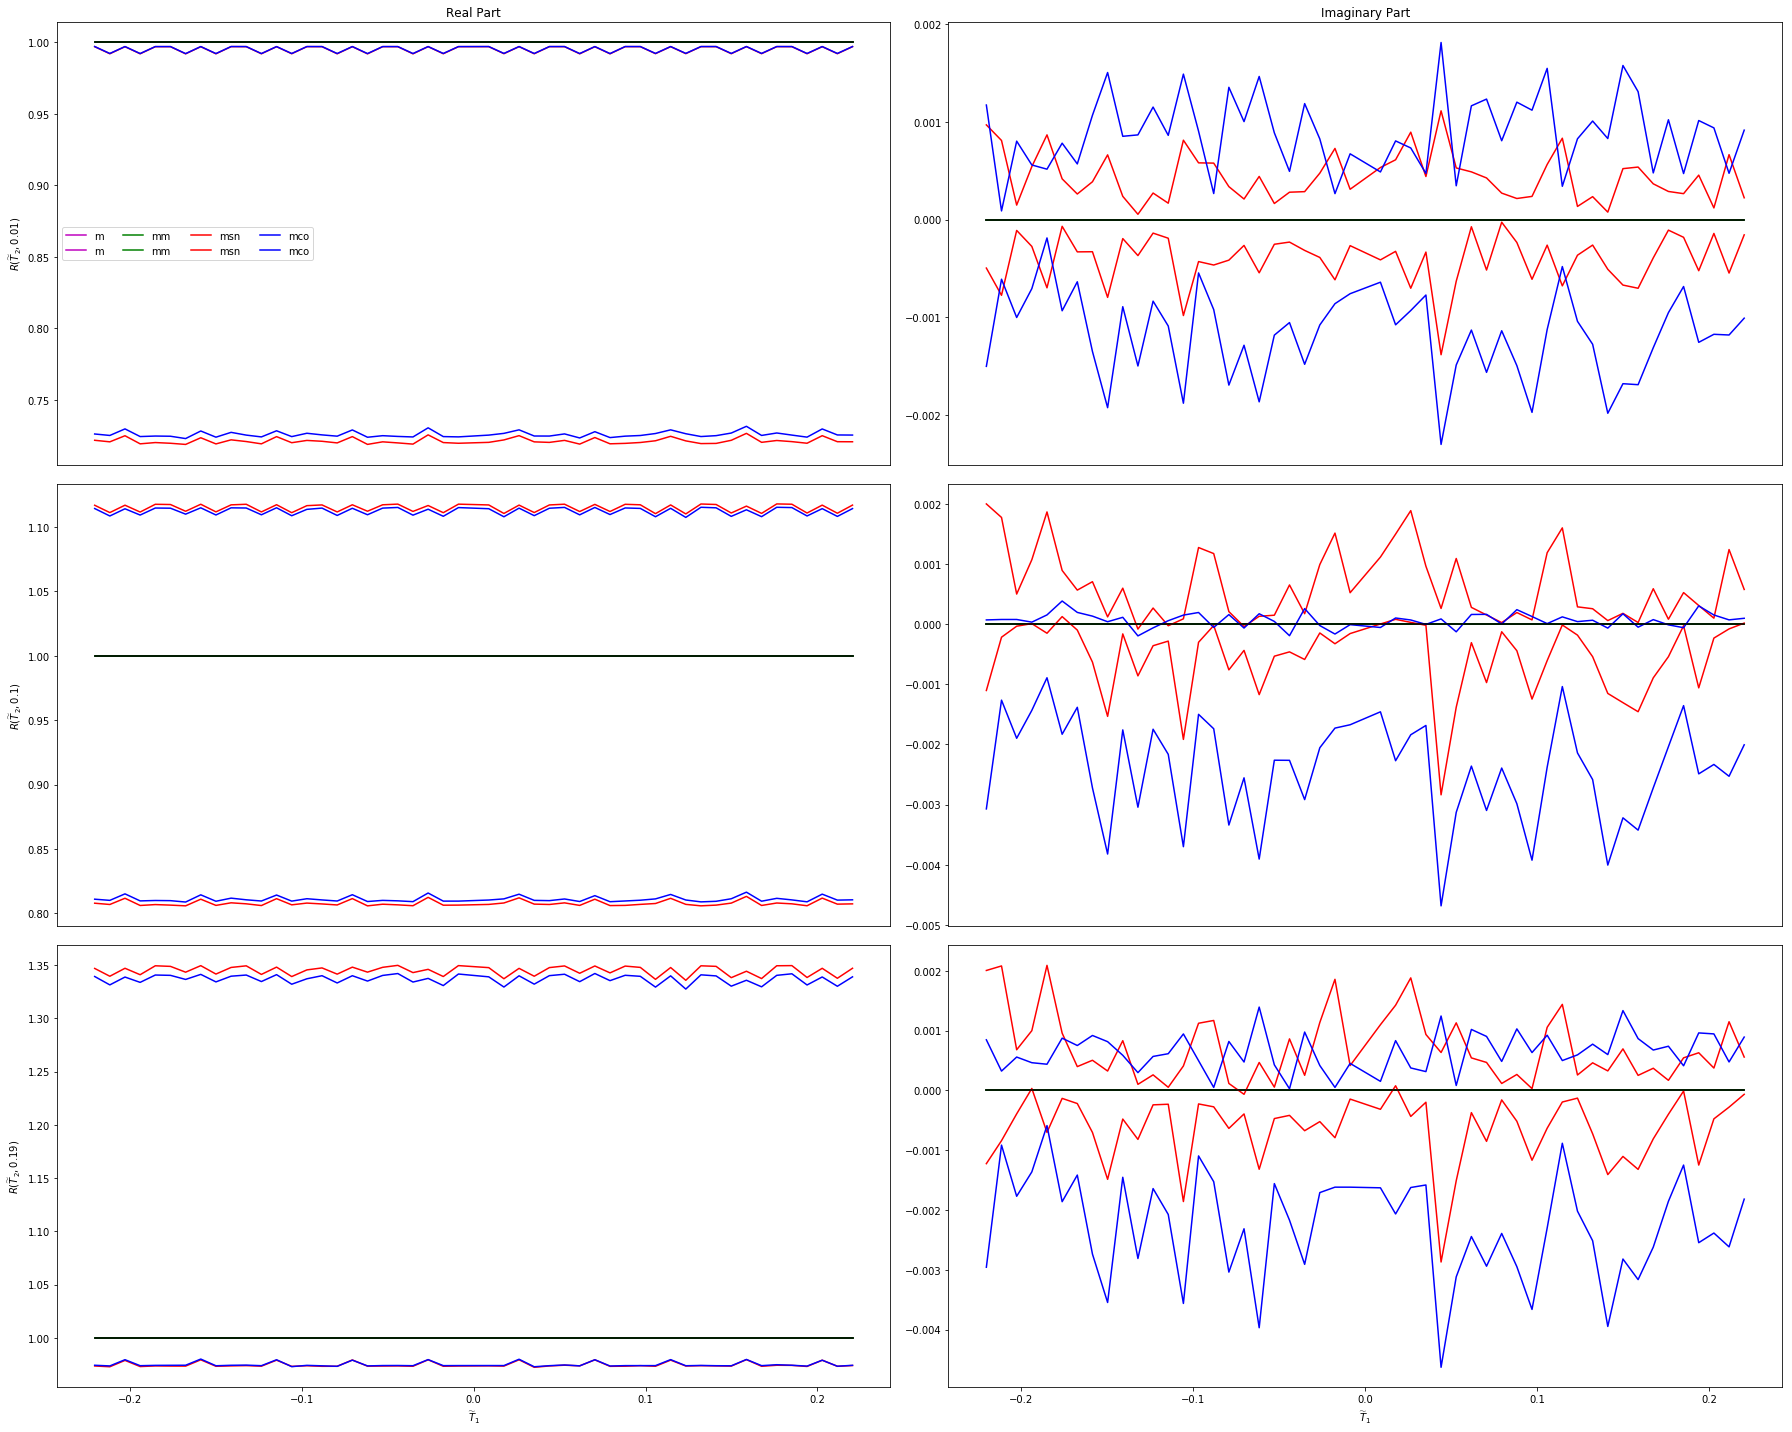

In [10]:
#plotting 5/95th percentile 
 
def percentile(Rr,Ri,jj,num_maps): 
    col_r = []
    col_i = []
    for rr,ri in zip(Rr,Ri): 
        col_r.append(rr[:,jj]) 
        col_i.append(ri[:,jj])
    matrix_r = np.array(col_r).reshape(50,num_maps)
    matrix_i = np.array(col_i).reshape(50,num_maps)
    
    percentile_r, percentile_i = [], []
    for n in range(50): 
        val_r, val_i = [], []
        row_r, row_i = matrix_r[n,:], matrix_i[n,:]
        a,b,c,d = np.percentile(row_r,5),np.percentile(row_r,95),\
                  np.percentile(row_i,5),np.percentile(row_i,95)
        val_r.extend([a,b])
        val_i.extend([c,d])
        percentile_r.append(val_r)
        percentile_i.append(val_i)
    
    return np.array(percentile_r).reshape(50,2), np.array(percentile_i).reshape(50,2) 
    
fig = plt.figure(figsize=[25,20])
for jj, odd, even in zip([0,10,20], [1,3,5], [2,4,6]):
    
    mpr,mpi = percentile(mRr,mRi,jj,80)
    mmpr,mmpi = percentile(mmRr,mmRi,jj,80)
    msnpr,msnpi = percentile(msnRr,msnRi,jj,80)
    mcopr,mcopi = percentile(mcoRr,mcoRi,jj,80)

    ax = plt.subplot(3,2,odd)
    plt.plot(mfT1[0],mpr,color='m',label='m')
    plt.plot(mfT1[0],mmpr,color='g',label='mm')
    plt.plot(mfT1[0],msnpr,color='r',label='msn')
    plt.plot(mfT1[0],mcopr,color='b',label='mco')
    plt.plot(mfT1[0],np.ones(50),color='k')
    if odd<5: 
        ax.set_xticks([])
    else:
        ax.set_xlabel('$\widetilde{T}_1$') 
    if odd==1:
        plt.legend(loc='center left',ncol=4)
        ax.set_title("Real Part")
    ax.set_ylabel('$R(\widetilde{T}_2,$'+str(mfT2[0][jj].round(2))+'$)$')

        
    ax = plt.subplot(3,2,even)
    plt.plot(mfT1[0],mpi,color='m')
    plt.plot(mfT1[0],mmpi,color='g')
    plt.plot(mfT1[0],msnpi,color='r')
    plt.plot(mfT1[0],mcopi,color='b')
    plt.plot(mfT1[0],np.zeros(50),color='k')
    if even<6: 
        ax.set_xticks([])
    else:
        ax.set_xlabel('$\widetilde{T}_1$') 
    if even==2:
        ax.set_title("Imaginary Part")

    plt.tight_layout()
    
#plt.savefig("mco_percentile_30")